In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('myData.csv')  # Adjust the filename if needed

# Group by 'N' and calculate the percentage difference in 'Average_Virulence' between s = 0 and s = 1
def percentage_difference(group):
    s0 = group[group['s'] == 0]['Average_Virulence'].values
    s1 = group[group['s'] == 1]['Average_Virulence'].values
    if len(s0) > 0 and len(s1) > 0:
        return ((s1[0] - s0[0]) / s0[0]) * 100
    return None  # Return None if there's no matching s=0 or s=1

# Apply the function to each group, selecting only the 's' and 'Average_Virulence' columns to avoid the warning
percent_diff_df = df.groupby('N')[['s', 'Average_Virulence']].apply(percentage_difference).reset_index(name='% Difference')

percent_diff_df.head()

,N,% Difference
0,1,0.020693
1,2,16.406464
2,3,53.186431
3,4,56.412324
4,5,92.931352


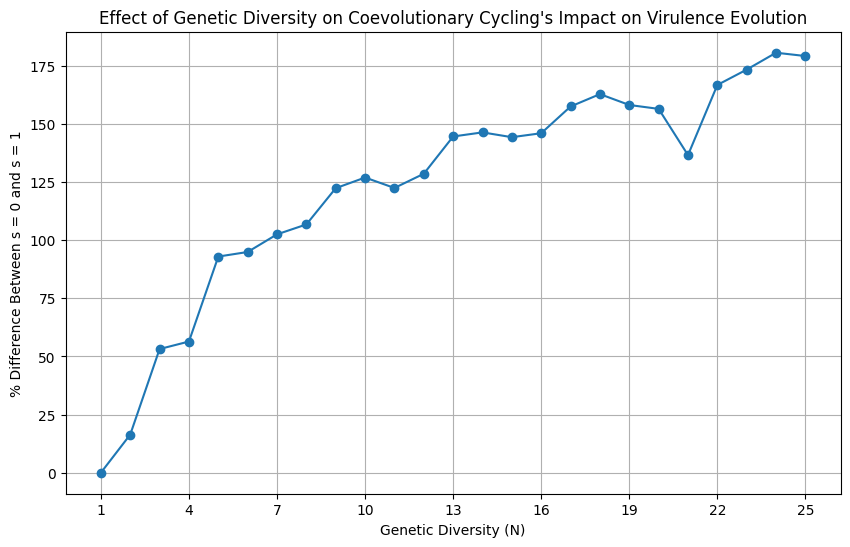

In [9]:
# Plotting N vs % Difference
plt.figure(figsize=(10, 6))
plt.plot(percent_diff_df['N'], percent_diff_df['% Difference'], marker='o', linestyle='-')
plt.xlabel('Genetic Diversity (N)')
plt.ylabel('% Difference Between s = 0 and s = 1')
plt.title("Effect of Genetic Diversity on Coevolutionary Cycling's Impact on Virulence Evolution")
plt.xticks(ticks=range(int(percent_diff_df['N'].min()), int(percent_diff_df['N'].max()) + 1, 3))
plt.grid(True)
plt.savefig('diversityImpact.png', dpi=600)
plt.show()